In [4]:
import pandas as pd
df = pd.read_excel(r'C:\Users\Edu\Desktop\Definitivo.xlsx', 'sa_ln3', header = 1).set_index('Date')
df

,Ex_rate,FCR,CPI,M1,r,WTI
Date,,,,,,
1989-01-02,2.809889,NaN,NaN,NaN,NaN,NaN
1989-02-02,2.769522,NaN,NaN,NaN,NaN,NaN
1989-03-02,2.795822,NaN,NaN,NaN,NaN,NaN
1989-04-02,1.875128,NaN,NaN,NaN,NaN,NaN
1989-05-02,2.770260,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-04-02,0.314113,10.244460,2.552888,11.267428,-155.619340,-101.692639
2020-05-02,0.179826,-21.165771,1.701951,11.770574,-155.619340,-10.650261
2020-06-02,0.101289,-14.761145,1.022850,7.443343,-124.011185,48.450071


In [5]:
df = df.dropna()

df

,Ex_rate,FCR,CPI,M1,r,WTI
Date,,,,,,
2002-12-02,0.035996,4.726819,0.111022,12.034886,155.016474,126.493914
2003-01-02,0.030662,70.418240,-0.867953,12.878867,120.104139,140.880666
2003-02-02,0.015999,74.693069,-1.221771,10.515502,120.104139,126.793434
2003-03-02,0.018665,110.774910,-0.499122,12.370191,122.593780,42.934843
2003-04-02,-0.017331,145.355871,-0.232143,11.239785,94.000726,23.695003
...,...,...,...,...,...,...
2020-04-02,0.314113,10.244460,2.552888,11.267428,-155.619340,-101.692639
2020-05-02,0.179826,-21.165771,1.701951,11.770574,-155.619340,-10.650261
2020-06-02,0.101289,-14.761145,1.022850,7.443343,-124.011185,48.450071


In [6]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)

(207, 6)
(4, 6)


In [7]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
          
# ADF Test on each column
        
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Ex_rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.381
 No. Lags Chosen       = 13
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "FCR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9306
 No. Lags Chosen       = 13
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.0018. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CPI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

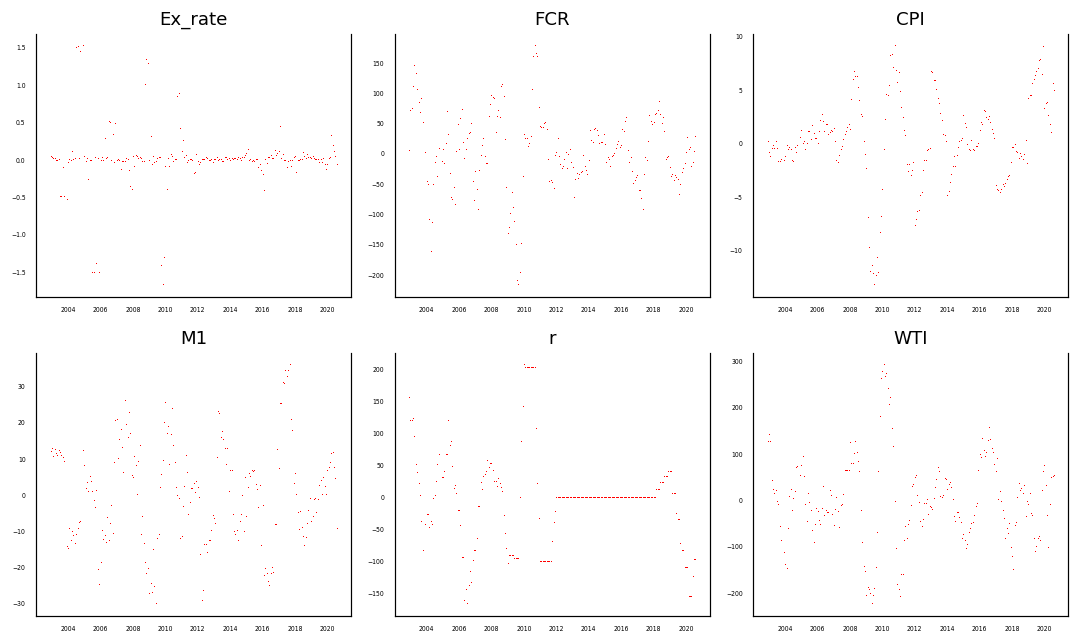

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=109, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]] #Esto es para que los títulos tengan los mismos nombres que los cabezales
    ax.plot(data, ',', color='red', linewidth=99)
 # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
#6. Testing Causation using Granger’s Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=14
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
    
grangers_causation_matrix(df, variables = df.columns)

,Ex_rate_x,FCR_x,CPI_x,M1_x,r_x,WTI_x
Ex_rate_y,1.0000,0.0000,0.0143,0.0000,0.0000,0.0
FCR_y,0.0000,1.0000,0.0014,0.0000,0.0000,0.0
CPI_y,0.0129,0.0042,1.0000,0.0015,0.0000,0.0
M1_y,0.0000,0.0011,0.0001,1.0000,0.0004,0.0
r_y,0.0000,0.0000,0.0000,0.0092,1.0000,0.0
WTI_y,0.0102,0.0000,0.0002,0.0000,0.0000,1.0


In [10]:
#Es muy interesante esto que hemos encontrado de las endógenas y exógenas
#Tal vez deberiamos incluir WTI en el grupo de endógenas
#saber como se pone la frecuencia queda pendiente
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
model = VAR(endog=df[['Ex_rate','WTI']],exog=df[['FCR','M1','WTI']],freq=None)

C:\Users\Edu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [11]:
#fit([maxlags, method, ic, trend, verbose])
results = model.fit(maxlags=None,method='ols',ic='hqic',trend='nc',verbose=True)
results.summary()

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 7, BIC -> 7, FPE -> 7, HQIC -> 7>
Using 7 based on hqic criterion


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Oct, 2020
Time:                     21:48:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -62.3027
Nobs:                     204.000    HQIC:                  -62.6320
Log likelihood:           5866.36    FPE:                5.04001e-28
AIC:                     -62.8557    Det(Omega_mle):     4.29445e-28
--------------------------------------------------------------------
Results for equation Ex_rate
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
FCR                0.000824         0.000447            1.843           0.065
M1                -0.000935         0.001795           -0.521           0.603
WTI               -0.001166         0.000738           -1.581         

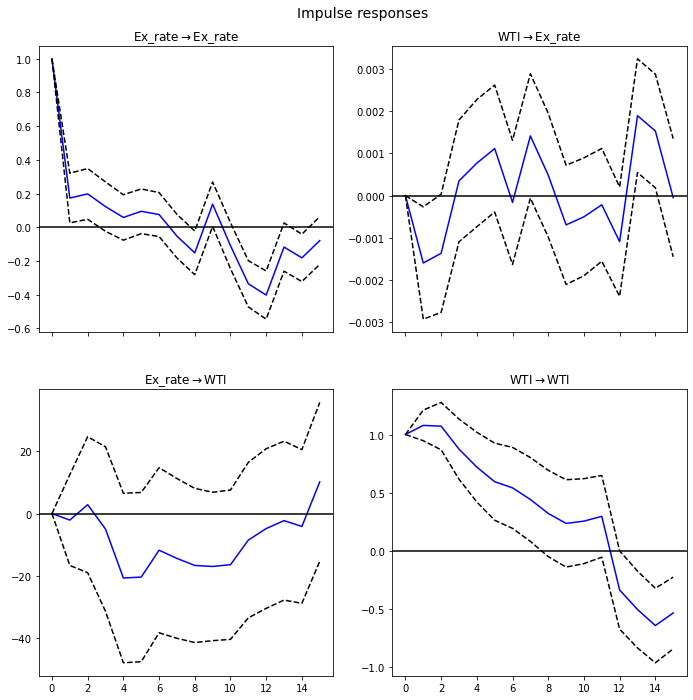

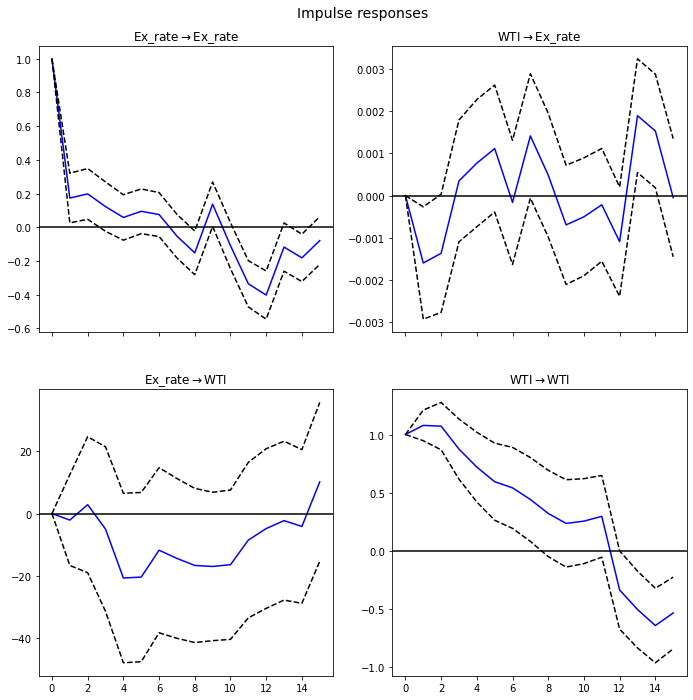

In [14]:

irf = results.irf(15)
irf.plot(orth=False)